In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.reset_defaults()
sns.set_theme(style='whitegrid')

In [56]:
def benchmark(source, input_file='input.txt', n=10**6, cc='g++', flags='-Wall'):
    !{cc} -std=c++17 -O3 -funroll-loops -march=native {flags} {source}.cc -o {source}
    res = !./{source} {n} < {input_file}
    check = res[0]
    ns = float(res[1].split()[1])
    cycles = 2 * ns / 8.888
    print(check, ns, cycles)

benchmark('scanf', 'input.txt')

90401790 188.8 42.484248424842484


In [20]:
benchmark('iostream','input.txt', n=10**7)

76629179 439.7581 98.95546804680468


In [37]:
benchmark('burunduk','large.txt', n=10**8)

58888569 24.025 5.406165616561656


In [35]:
benchmark('buffered', 'large.txt', n=10**8)

58888569 12.4709 2.806233123312331


In [72]:
benchmark('iostream','input.txt', n=10**7, cc='clang++')

76629179 441.3871 99.3220297029703


In [71]:
benchmark('scanf','input.txt', n=10**7, cc='clang++')

76629179 178.392 40.142214221422144


In [46]:
184.7978/11

16.7998

In [36]:
benchmark('mmaped','large.txt', n=10**8)

58888569 11.2546 2.5325382538253827


In [42]:
benchmark('transpose','large.txt', n=10**8)

58888569 4.9376 1.111071107110711


In [43]:
benchmark('transpose-wide', 'large.txt', n=10**8)

58888569 3.9774 0.895004500450045


In [73]:
benchmark('transpose-wide', 'large.txt', n=10**8)

58888569 3.8017 0.8554680468046805


In [89]:
benchmark('transpose-mmap', 'large.txt', n=10**8)

58888569 3.6863 0.8295004500450045


In [88]:
benchmark('transpose-mmap-wide', 'large.txt', n=10**8)

58888569 3.6969 0.8318856885688568


0.22 transpose only
0.64 update only
0.84 combined

10xxxxxx first sep   dump, x = c & low
11xxxxxx second sep  x = x *10 + c & low, dump, x = 0
111xxxxx both sep    do nothing (ignore for now)
0xxxxxxx none sep    x = x * 100 + c

m10 = x * 10
m100 = x * 100
clow = c & low

chigh = c & high
mfirst = (chigh == 10)
msecond = (chigh == 11)
mnone = mfirst | msecond

dumpval = 
    0           if mnone
    x           if mfirst
    m10 + clow  if msecond

x =
    m100 + c    if mnone
    clow        if mfirst
    0           if msecond

need special mark to support zeros

clow = c & low
chigh = c & high2

mfirst = (chigh == 10)
msecond = (chigh == 11)

dumpval = x if mfirst else 0
dumpval = x * 10 + clow if msecond else dumpval

x = clow if mfirst else x * 100 + c
x = 0 if msecond else x

In [53]:
-38 * 10 + 5

-375

In [ ]:
m = z > c

y = x * 10 + c
s = s ^ (m & x)
x = blend(y, z, m)

In [21]:
98.95546804680468/2.5

39.58218721872187

In [23]:
41.295679567956796/0.4

103.23919891989199

In [19]:
41.295679567956796/2.5

16.51827182718272

In [8]:
benchmark('getchar_unlocked', n=10**7)

76629179 42.0781 9.468519351935193


In [20]:
benchmark('burunduk')

90401790 24.537 5.521377137713771


In [30]:
benchmark('simd16', n=10**7)

76629179 12.4377 2.7987623762376237


In [35]:
benchmark('simd16', 'large.txt', n=10**8)

58888569 10.9939 2.473874887488749


In [39]:
benchmark('transpose-wide', 'large.txt', n=10**8)

58888569 3.8739 0.8717146714671467


In [49]:
benchmark('transpose', 'large.txt', n=10**8)

56652457 1.7859 0.4018676867686769


0.30 is reading
0.40 is transposition
1.15 total

0.38 read
0.06 transpose
0.24 twice 
0.5  filter (0.25 if we use original char array?)

dissect later in the article

In [46]:
2 * 0.0078 * 10**9 / (86 * 10**6)

0.1813953488372093

In [5]:
benchmark('mmap', 'large.txt', n=10**8)

mmap.cc: In function ‘int read(int)’:
mmap.cc:6:11: warning: unused variable ‘buffer’ []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-variable-Wunused-variable]8;;]
    6 |     char* buffer = (char*) mmap(0, fsize, PROT_READ, MAP_PRIVATE | MAP_POPULATE, 0, 0);
      |           ^~~~~~
888893772 4.7109 1.060058505850585


In [37]:
benchmark('simd16-parallel', 'large.txt', n=10**8)

98343609 4.228 0.9513951395139514


In [ ]:
0.1182 1.1817 0.2656
0.1483 1.4825 0.3332
0.4283 4.2835 0.9626


0.0676 x4 = 0.2704
0.5

0.5

2.1

In [4]:
results = [
    ('iostream', 430.7935),
    ('scanf', 166.3727),
    ('iostream_nosync', 109.7011),
    ('getchar', 44.8829),
    ('getchar_unlocked', 26.8387),
    ('buffered', 14.2771),
    ('simd_serial', 10.0660),
    ('simd_transpose', 5.3479),
]

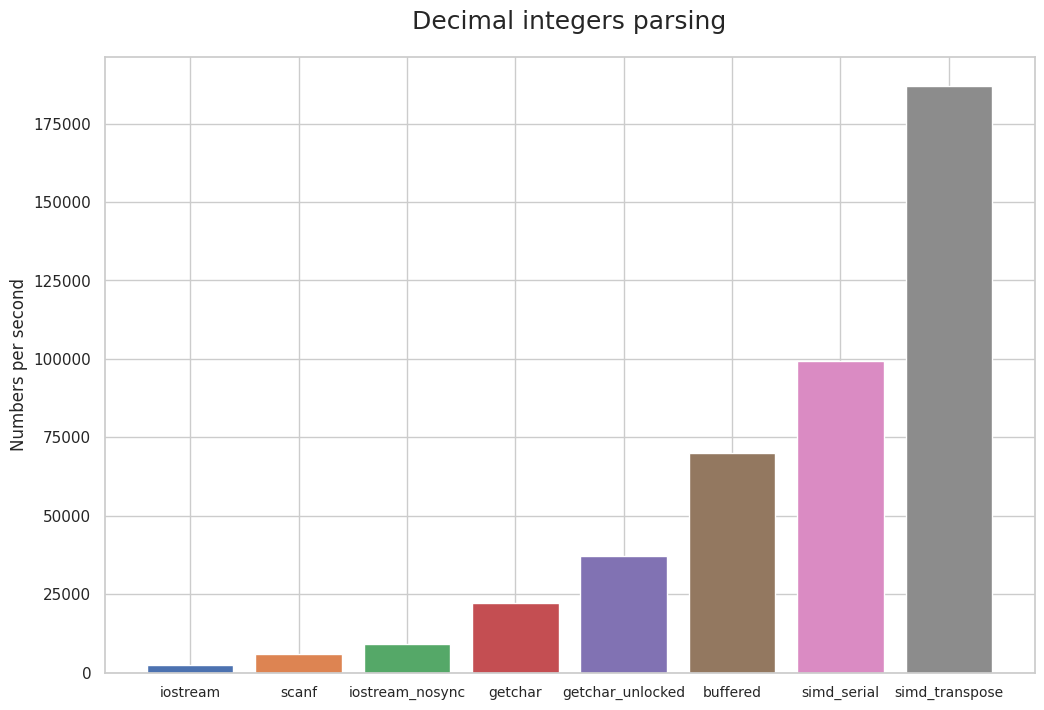

In [23]:
plt.title("Decimal integers parsing", fontsize=18, pad=20)
plt.ylabel("Numbers per second")

plt.tick_params(axis='x', labelsize=10)

for i, (x, y) in enumerate(results):
    plt.bar(x, 10**6 / y)

fig = plt.gcf()
fig.set_size_inches(12, 8)
#fig.savefig(filename)

plt.show()